# Lab 1
### Kirill Zakharov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

from sklearn.manifold import TSNE
import plotly.express as px

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('zeus.us.txt')['Close'].values

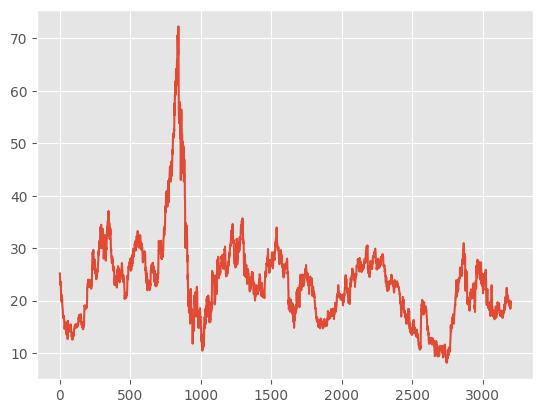

In [3]:
plt.plot(data)

plt.show()

In [4]:
# !pip install nolds
# !pip install git+https://github.com/manu-mannattil/nolitsa.git
# !python -m pip install -U giotto-tda

In [5]:
import nolds
from nolitsa import dimension, delay

In [6]:
nolds.corr_dim(data, 10)

3.444099760731923

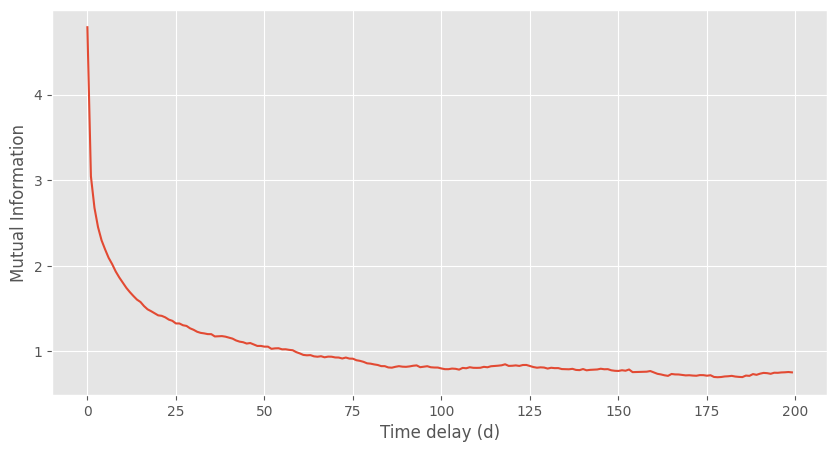

In [7]:
plt.subplots(figsize=(10,5), dpi=100)

plt.plot(delay.dmi(data, maxtau=200))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')

plt.show()

In [8]:
mi = np.diff(delay.dmi(data, maxtau=200))
    
np.where(mi > 0)[0][0]

36

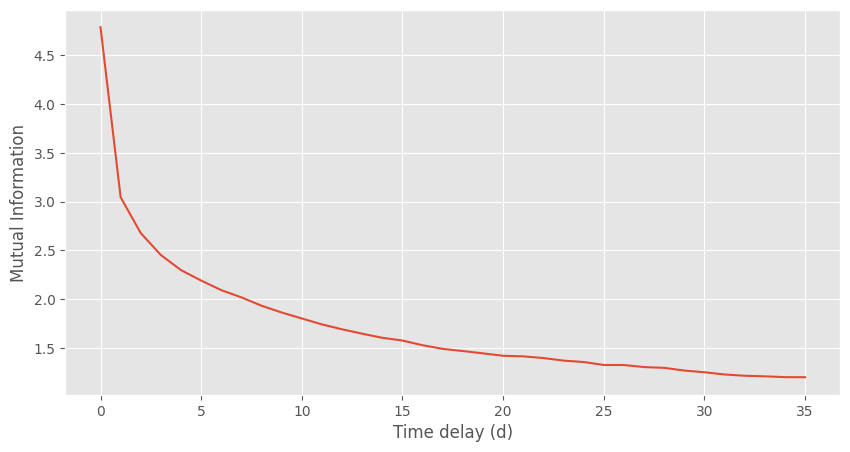

In [9]:
plt.subplots(figsize=(10,5), dpi=100)

plt.plot(delay.dmi(data, maxtau=36))
plt.xlabel('Time delay (d)')
plt.ylabel('Mutual Information')

plt.show()

In [10]:
dim = np.arange(1, 10)
f1, f2, f3 = dimension.fnn(data, tau=36, dim=dim)

np.where(f1 < 0.2)[0][0] + 1

3

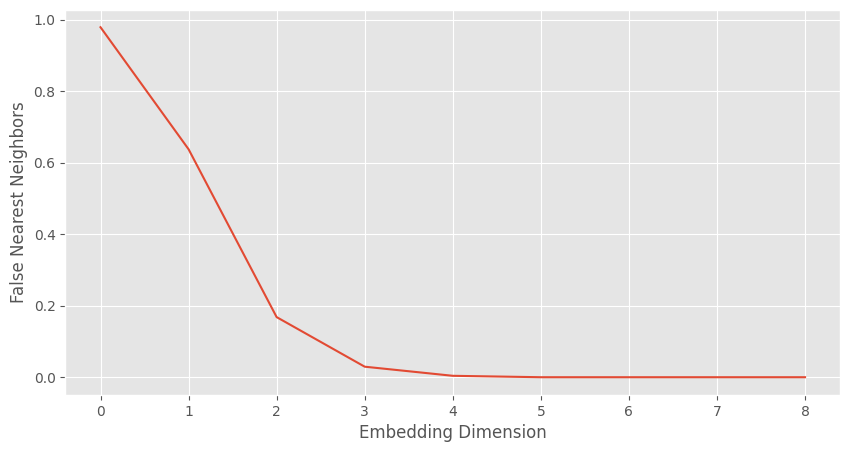

In [11]:
plt.subplots(figsize=(10,5), dpi=100)

dim = np.arange(1, 10)
f1, f2, f3 = dimension.fnn(data, tau=36, dim=dim)

plt.plot(f1)
plt.xlabel('Embedding Dimension')
plt.ylabel('False Nearest Neighbors')

plt.show()

In [12]:
from giottotda.gtda.time_series import embedding

In [13]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    data, 100, 10, stride=1
    )

In [14]:
optimal_time_delay

98

In [15]:
optimal_embedding_dimension

6

In [16]:
def takens(data, dim=2, delay=2):
    emb = np.array([data[0:len(data) - delay*dim]])
    for i in range(1, dim):
        emb = np.append(emb, [data[i*delay:len(data) - delay*(dim - i)]], axis=0)
        
    return emb.T

In [17]:
phase_traj = takens(data, dim=3, delay=36)

In [18]:
fig = px.line_3d(pd.DataFrame(phase_traj, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()

In [19]:
tsne = TSNE(n_components=2)
phase_traj_proj = tsne.fit_transform(phase_traj)

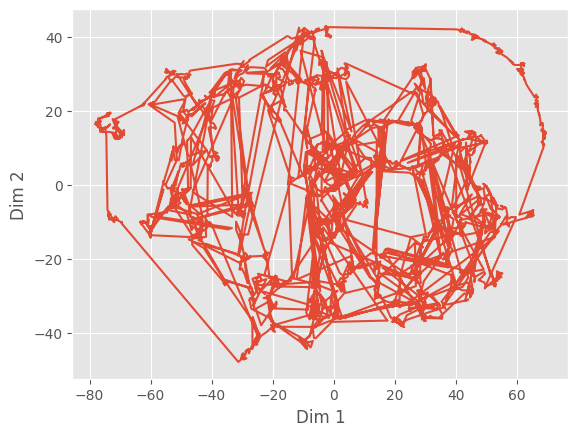

In [20]:
plt.plot(phase_traj_proj[:, 0], phase_traj_proj[:, 1])

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

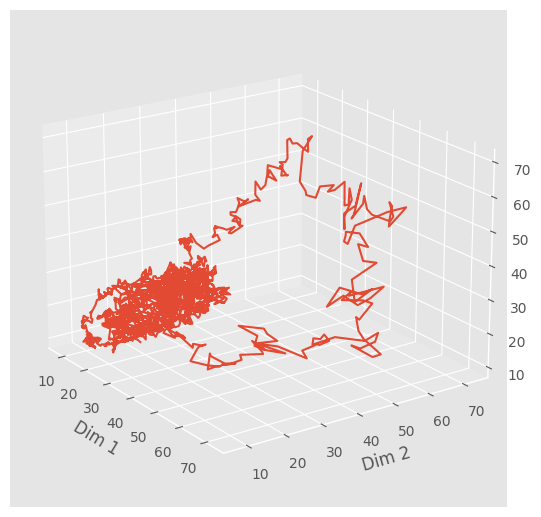

In [21]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.plot(phase_traj[:, 0], phase_traj[:, 1], phase_traj[:, 2])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [22]:
phase_traj = takens(data, dim=6, delay=98)
tsne = TSNE(n_components=2)
phase_traj_proj = tsne.fit_transform(phase_traj)

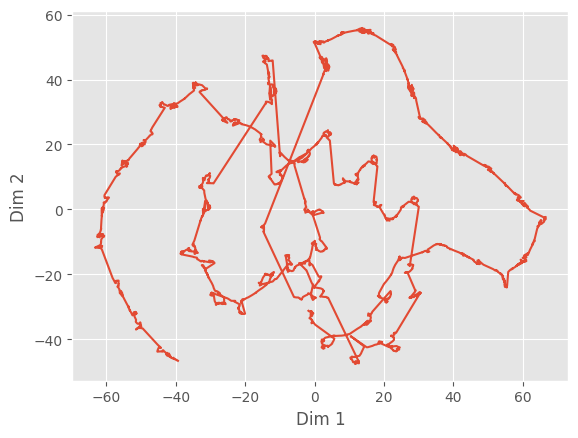

In [23]:
plt.plot(phase_traj_proj[:, 0], phase_traj_proj[:, 1])

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [24]:
phase_traj = takens(data, dim=6, delay=98)
tsne = TSNE(n_components=3)
phase_traj_proj = tsne.fit_transform(phase_traj)

In [25]:
fig = px.line_3d(pd.DataFrame(phase_traj_proj, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()